In [0]:
import keras
import pandas as pd
import numpy as np

Using TensorFlow backend.


# 1. Data Preparation

In [0]:
max_item_id = 10000		# use as a way to constrict memory errors, increase as needed

## 1.1 Playtime Matrix

Source file: User_items.json 

{'user_id': '76561197970982479',
 'items_count': 277,
 'steam_id': '76561197970982479',
 'user_url': 'http://steamcommunity.com/profiles/76561197970982479',
 'items': [{'item_id': '10',
 'item_name': 'Counter-Strike',
 'playtime_forever': 6,
 'playtime_2weeks': 0},
 {'item_id': '20',
 'item_name': 'Team Fortress Classic',
 'playtime_forever': 0,
 'playtime_2weeks': 0},}
 
 
 We reorganize it as a user_item matrix. This is the main input layer.

In [0]:
# import json
# import pandas as pd
# import ast
# import numpy as np
# from collections import OrderedDict
# from sklearn.preprocessing import MinMaxScaler

# filepath = './user_items.json'
# writefilepath = './user_items_playtime_' + str(max_item_id) + '.csv'

# data = []
# game_ids_valid = set()	# We only want to have game ids that appear in any user's game list

# num_games_considered = 0 # Just for profiling
# num_valid_users = 0		# Also profiling

# count = 0
# with open(filepath,encoding='gb18030',errors='ignore') as f:
# 	for line in f:
# 		l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes

# 		# Don't consider a user that doesn't own any games
# 		if int(l["items_count"]) > 0:		
# 			games = l["items"]
# 			games_filter = []
# 			for g in games:
# 				playtime = g["playtime_forever"]
# 				if playtime > 0:	# Also don't consider games not played
# 					game_id = int(g["item_id"])
# 					if game_id <=  max_item_id: 		# Set limit on games due to space
# 						games_filter.append({game_id: playtime})
# 						game_ids_valid.add(game_id)
# 						num_games_considered += 1

# 			if len(games_filter) >= 1:		
# 				num_valid_users += 1	
# 				data.append({l["user_id"]: games_filter})
        
# 		#count = count+1
# 		#print(count)

        

# print(max_item_id)
# print(num_games_considered)
# print(len(game_ids_valid))
# print(num_valid_users)

In [0]:
# # Now with format as data (list of nested JSON objects) = 	[	{user_id: [	{item_id: playtime_forever}		]	}	]
# # Convert to dataframe where
# #		item_id		0		..		max_item_id		
# #  user_id 			
# #	x1				playtime_forever
# #	...
# #	xn
# #
# # 
# # Create list of game_id's only based on the valid game ids
# game_list = list(game_ids_valid)
# game_list = sorted(game_list)
# print(*game_list)
# games_dict = OrderedDict()

# df = pd.DataFrame(columns = list(game_list))
# items_list = np.zeros(len(game_list))


# for user in data:
	
# 	# Clear entries of sorted Dictionary (and creates the first set of key-value pairs)
# 	for k in game_list:	
# 		games_dict[k] = 0

# 	key = next(iter(user))	# Note there's only one key. User is {user_id: [...]}
# 	df.loc[key] = 0
# 	items = user[key]
# 	for i in items:
# 		[(k, v)] = i.items()
# 		games_dict[k] = v

# 	# Make the list based on the sorted values in dict
# 	val = list(games_dict.values())
# 	for i in range(len(game_list)):
# 		df.loc[key][game_list[i]] = val[i]

# df.to_csv(writefilepath, index=False)

In [0]:
writefilepath = './user_items_playtime_' + str(max_item_id) + '.csv'
df_matrix = pd.read_csv(writefilepath,engine='python')
print(df_matrix.shape)
df_matrix.head()

(61244, 354)


,10,20,30,40,50,60,70,80,100,130,220,240,280,300,320,340,360,380,400,420,500,550,620,730,1002,1200,1230,1250,1280,1300,1309,1313,1500,1510,1520,1530,1600,1610,1630,1640,...,8890,8930,8970,8980,9000,9010,9030,9040,9050,9060,9070,9160,9180,9200,9310,9340,9350,9400,9420,9450,9460,9480,9500,9710,9730,9740,9760,9800,9850,9860,9870,9880,9900,9930,9940,9960,9970,9980,9990,10000
0,6,0,7,0,0,0,0,0,0,0,696,1853,0,4733,0,37,0,168,173,323,513,1474,887,23532,0,0,0,10006,0,0,0,0,0,0,0,0,0,0,0,0,...,0,10345,0,3061,0,0,0,0,0,0,0,0,0,653,0,692,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,750,62,0,220,0,21,0,181,169,295,0,83,3464,265,0,0,0,428,0,0,0,0,0,0,0,0,0,0,0,0,...,0,748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,224,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1323,0,0,0,0,90,0,234,113,507,0,82,1485,1569,0,923,0,1646,0,0,0,0,0,0,158,0,0,0,0,0,...,0,0,0,9202,0,616,0,0,32,0,0,0,218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,92,2304,0,67,0,0,0,0,1234,119,103,330,5138,4167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,19,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,93,89,16,4,178,0,108,13,47,313,89,164,0,1131,187,19,0,491,167,233,0,9216,802,19800,0,0,0,3546,0,18,0,4,1,0,19,0,0,0,0,0,...,0,2699,0,4076,0,25,0,0,9,0,0,0,0,970,0,1211,0,0,0,0,0,320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
##scale matrix
tmax = 50 * 60 # 50 hrs
df_scaled_matrix = np.tanh(df_matrix * 2 / tmax)

In [0]:
df_scaled_matrix.head()

,10,20,30,40,50,60,70,80,100,130,220,240,280,300,320,340,360,380,400,420,500,550,620,730,1002,1200,1230,1250,1280,1300,1309,1313,1500,1510,1520,1530,1600,1610,1630,1640,...,8890,8930,8970,8980,9000,9010,9030,9040,9050,9060,9070,9160,9180,9200,9310,9340,9350,9400,9420,9450,9460,9480,9500,9710,9730,9740,9760,9800,9850,9860,9870,9880,9900,9930,9940,9960,9970,9980,9990,10000
0,0.004000,0.000000,0.004667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.433339,0.844119,0.0,0.996373,0.000000,0.024662,0.0,0.111534,0.114825,0.212066,0.329262,0.754218,0.530854,1.000000,0.0,0.00000,0.0,0.999997,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.999998,0.0,0.966791,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.409769,0.0,0.431170,0.0,0.0,0.0,0.0,0.0,0.000000,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.462117,0.041310,0.0,0.145624,0.000000,0.013999,0.0,0.120084,0.112192,0.194170,0.000000,0.055277,0.980461,0.174851,0.0,0.00000,0.0,0.277834,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.461068,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.019997,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148233,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.707420,0.000000,0.0,0.000000,0.000000,0.059928,0.0,0.154747,0.075191,0.325691,0.000000,0.054612,0.757362,0.780246,0.0,0.54787,0.0,0.799539,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.104945,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.999991,0.0,0.389039,0.0,0.0,0.02133,0.0,0.0,0.0,0.144319,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.061257,0.911446,0.0,0.044637,0.000000,0.000000,0.0,0.000000,0.676519,0.079167,0.068559,0.216518,0.997885,0.992301,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.012666,0.0,0.021996,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.025994,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.061921,0.059264,0.010666,0.002667,0.118113,0.0,0.071876,0.008666,0.031323,0.20569,0.059264,0.108900,0.0,0.637529,0.124025,0.012666,0.0,0.316123,0.110876,0.154096,0.000000,0.999991,0.488940,1.000000,0.0,0.00000,0.0,0.982467,0.0,0.011999,0.0,0.002667,0.000667,0.0,0.012666,0.0,0.0,0.0,0.0,0.0,...,0.0,0.946737,0.0,0.991313,0.0,0.016665,0.0,0.0,0.00600,0.0,0.0,0.0,0.000000,0.569422,0.0,0.668117,0.0,0.0,0.0,0.0,0.0,0.210155,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


##1.2 Game Info

In [0]:
# import ast
# import json
# import pandas as pd

# filepath = './steam_games.json'
# writefilepath = './steam_games.csv'


# df = pd.DataFrame(columns = ['name','genres','publisher','developer','price'])

# count = 0
# with open(filepath,encoding='gb18030',errors='ignore') as f:
# # 	single_game = 0
#     for line in f:
#       l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes
      
#       if "id" not in l:
#         print(l)
#         continue
      
#       if "title" in l:
#         name = l["title"]
#       elif "app_name" in l:
#         name = l["app_name"]
#       else:
#         name = 0
#         print(l)
      
#       if "publisher" in l:
#         publisher = l["publisher"]
#       else:
#         publisher = 0


#       if "developer" in l:
#         developer = l["developer"]
#       else:
#         developer = 0
      
#       if "genres" in l:
#         genres = l["genres"]
#       elif "tags" in l:
#         genres = l["tags"]
#       else:
#         genres = 0
        
#       if "price" not in l or not isinstance(l["price"], float):
#         price = 0
#       else:
#         price = l["price"]
      
#       df.loc[int(l["id"])] = pd.Series({'name': name,'genres': genres,'publisher': developer,'developer': publisher,'price': price,}) 

# print("Size = {}\nShape ={}". format(df.size, df.shape)) 
# df = df.sort_index()



In [0]:
#df.to_csv(writefilepath, encoding='utf_8_sig')

In [0]:
df_games = pd.read_csv('./steam_games.csv',index_col="Unnamed: 0")
df_games

,name,genres,publisher,developer,price
10,Counter-Strike,['Action'],Valve,Valve,9.99
20,Team Fortress Classic,['Action'],Valve,Valve,4.99
30,Day of Defeat,['Action'],Valve,Valve,4.99
40,Deathmatch Classic,['Action'],Valve,Valve,4.99
50,Half-Life: Opposing Force,['Action'],Gearbox Software,Valve,4.99
60,Ricochet,['Action'],Valve,Valve,4.99
70,Half-Life,['Action'],Valve,Valve,9.99
80,Counter-Strike: Condition Zero,['Action'],Valve,Valve,9.99
130,Half-Life: Blue Shift,['Action'],Gearbox Software,Valve,4.99
220,Half-Life 2,['Action'],Valve,Valve,9.99


# 2. Model Compilation & Training

In [0]:
#cut number of users
rate = 0.2
n = int(len(df_scaled_matrix) * rate)

# input
X = df_scaled_matrix.values[:n]
y = df_scaled_matrix.values[:n]

In [0]:
#From https://github.com/marlesson/recsys_autoencoders/blob/master/notebooks/DeepAutoEncoderContent%20-%20Simple%20Train.ipynb
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout, Embedding, Flatten, add
from keras.models import Model
from keras.losses import mse, binary_crossentropy
from keras import backend as K

##Latent space
def autoEncoder(X):
    '''
    Autoencoder for Collaborative Filter Model
    '''
    users_items_matrix = X
    
    # Input
    input_layer   = Input(shape=(users_items_matrix.shape[1],), name='UserScore')
    
    # Encoder
    # -----------------------------
    enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)
    
    # Latent Space
    # -----------------------------
    lat_space = Dense(256, activation='selu', name='UserLatentSpace')(enc)
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

    # Decoder
    # -----------------------------
    dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(users_items_matrix.shape[1], activation='linear', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    model = Model(input_layer, output_layer)    

    return model

In [0]:
# Build model
model = autoEncoder(X)

model.compile(optimizer = Adam(lr=0.00005), loss='mse')
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
UserScore (InputLayer)       (None, 354)               0         
_________________________________________________________________
EncLayer1 (Dense)            (None, 512)               181760    
_________________________________________________________________
UserLatentSpace (Dense)      (None, 256)               131328    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
DecLayer1 (Dense)            (None, 512)               131584    
_________________________________________________________________
UserScorePred (Dense)        (None, 354)               181602    
Total params: 626,274
Trainable params: 626,274
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist = model.fit(x=X, y=y,
                  epochs=50,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

Train on 11023 samples, validate on 1225 samples
Epoch 1/50
11023/11023 [==============================] - 1s 125us/step - loss: 0.0744 - val_loss: 0.0107
Epoch 2/50
11023/11023 [==============================] - 1s 88us/step - loss: 0.0299 - val_loss: 0.0070
Epoch 3/50
11023/11023 [==============================] - 1s 85us/step - loss: 0.0185 - val_loss: 0.0053
Epoch 4/50
11023/11023 [==============================] - 1s 84us/step - loss: 0.0134 - val_loss: 0.0045
Epoch 5/50
11023/11023 [==============================] - 1s 86us/step - loss: 0.0105 - val_loss: 0.0039
Epoch 6/50
11023/11023 [==============================] - 1s 82us/step - loss: 0.0086 - val_loss: 0.0035
Epoch 7/50
11023/11023 [==============================] - 1s 73us/step - loss: 0.0074 - val_loss: 0.0032
Epoch 8/50
11023/11023 [==============================] - 1s 73us/step - loss: 0.0064 - val_loss: 0.0029
Epoch 9/50
11023/11023 [==============================] - 1s 72us/step - loss: 0.0057 - val_loss: 0.0027
Epoch

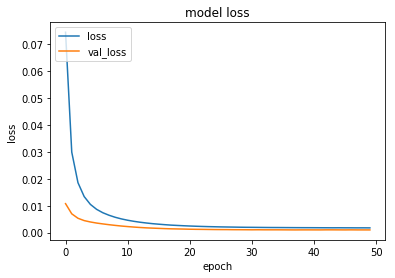

In [0]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    
    plt.legend(['loss', 'val_loss'], loc='upper left')

plot_hist(hist)

# 3. Predition and Recommendation

In [0]:
# Set played game to zero, so that we dont recommend games played
pred_matrix = model.predict(X) * (X[0] == 0)
pred_matrix

array([[-0.0000000e+00,  9.4871046e-03,  0.0000000e+00, ...,
         5.9803836e-03,  6.3488996e-03,  1.0272275e-02],
       [-0.0000000e+00,  4.0081567e-03, -0.0000000e+00, ...,
        -7.7048456e-03, -2.0603938e-03,  7.5830789e-03],
       [-0.0000000e+00, -5.8593126e-03, -0.0000000e+00, ...,
        -6.3991728e-03, -1.2891041e-02,  1.0080920e-02],
       ...,
       [ 0.0000000e+00,  5.6141708e-04, -0.0000000e+00, ...,
         1.4449917e-03, -2.1266395e-03,  7.1921665e-03],
       [ 0.0000000e+00,  3.6832816e-03, -0.0000000e+00, ...,
         7.2484119e-03,  5.4000607e-03,  4.1621672e-03],
       [-0.0000000e+00,  1.1541020e-02, -0.0000000e+00, ...,
        -1.1515798e-02, -3.8030092e-05,  5.1432904e-03]], dtype=float32)

In [0]:
# converting the reconstructed matrix back to a Pandas dataframe
df_pred_matrix  = pd.DataFrame(pred_matrix, 
                               columns = df_matrix.columns[:n], 
                               index   = df_matrix.index[:n])
df_pred_matrix.head()

,10,20,30,40,50,60,70,80,100,130,220,240,280,300,320,340,360,380,400,420,500,550,620,730,1002,1200,1230,1250,1280,1300,1309,1313,1500,1510,1520,1530,1600,1610,1630,1640,...,8890,8930,8970,8980,9000,9010,9030,9040,9050,9060,9070,9160,9180,9200,9310,9340,9350,9400,9420,9450,9460,9480,9500,9710,9730,9740,9760,9800,9850,9860,9870,9880,9900,9930,9940,9960,9970,9980,9990,10000
0,-0.0,0.009487,0.0,-0.001485,0.022628,-0.016975,0.077040,0.006404,-0.006069,0.004589,0.0,0.0,-0.000020,0.0,0.076106,0.0,-0.003139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.008392,0.028019,0.018645,0.0,0.027806,0.014486,-0.004407,-0.000207,0.007645,0.028377,0.044616,-0.013549,-0.009141,-0.008395,-0.006420,0.004740,...,0.007746,0.0,0.016127,0.0,0.007252,0.002005,-0.006268,-0.033324,0.010432,0.001708,0.011213,-0.011757,0.007638,0.0,-0.014197,0.0,-0.006631,0.014464,0.004064,0.031955,0.023020,0.081278,0.0,-0.000991,0.006661,0.008696,-0.015830,0.002095,0.007570,0.011851,0.015317,0.001041,-0.013610,0.018071,-0.008075,-0.007184,0.007509,0.005980,0.006349,0.010272
1,-0.0,0.004008,-0.0,0.001881,0.001703,-0.006520,0.027242,-0.013498,-0.006465,0.001185,0.0,0.0,0.002529,0.0,0.009578,0.0,-0.025923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.002845,0.005560,-0.000281,0.0,-0.007602,0.000256,0.013733,-0.001847,0.001584,0.003032,-0.000302,-0.005501,0.006486,-0.004155,0.000877,0.002933,...,0.007883,0.0,-0.007075,0.0,0.009446,-0.011163,-0.015470,0.001775,-0.002016,-0.002927,0.009319,-0.005488,0.004463,0.0,-0.000284,-0.0,-0.002073,-0.004369,-0.002288,-0.012995,-0.008933,-0.009037,0.0,0.000704,-0.009147,-0.000379,0.007617,0.000913,0.003936,0.003792,0.009170,0.001963,-0.009075,-0.001391,0.002466,0.001420,0.000374,-0.007705,-0.002060,0.007583
2,-0.0,-0.005859,-0.0,0.003136,0.045371,0.000797,0.060166,-0.006362,-0.024387,0.012300,0.0,0.0,-0.001641,-0.0,0.026558,0.0,0.005741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.015308,0.016403,-0.005323,0.0,0.020594,-0.003293,0.019918,-0.011490,-0.006488,0.003652,0.005027,-0.000789,-0.003770,0.000441,-0.018632,-0.009073,...,-0.002589,0.0,0.000219,0.0,0.009022,0.007119,0.009709,0.010821,0.010934,-0.002475,0.002997,-0.009212,-0.002368,0.0,-0.018661,-0.0,0.008892,0.012667,0.002747,-0.014918,-0.012900,0.048666,-0.0,-0.005904,0.007565,0.012002,-0.011078,-0.000278,-0.007139,0.006841,0.024498,0.002156,-0.029300,0.013701,-0.007357,0.005754,0.002219,-0.006399,-0.012891,0.010081
3,0.0,-0.017077,-0.0,-0.009456,-0.007179,0.004652,0.008854,0.004562,-0.000239,-0.012715,0.0,0.0,0.001591,0.0,0.013374,0.0,-0.003794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007692,-0.002537,-0.016224,-0.0,-0.001984,0.001376,0.004038,-0.018618,-0.002426,0.003619,0.000738,0.001738,0.014892,-0.003412,-0.013940,0.009268,...,-0.006287,-0.0,-0.008267,0.0,0.001545,0.000071,0.002813,-0.002087,-0.007632,-0.003094,-0.000767,-0.001919,-0.001627,0.0,-0.002421,-0.0,-0.008152,0.022729,-0.018078,-0.018127,0.009055,0.021686,-0.0,-0.004760,0.002494,-0.006146,-0.001775,0.006378,0.007419,0.004137,0.003299,-0.004835,-0.027185,0.022008,-0.015722,-0.008008,0.009757,-0.017460,0.003569,0.014196
4,-0.0,0.002244,0.0,-0.006789,0.029643,0.006894,0.083271,0.000305,-0.028686,0.015523,0.0,0.0,-0.000543,0.0,0.067651,0.0,-0.001390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007676,0.002664,0.010409,0.0,0.019312,0.006053,0.002564,-0.005708,-0.017722,0.006486,0.029901,-0.009270,-0.011299,0.017453,-0.005818,0.005663,...,-0.005290,0.0,0.003903,0.0,0.006214,0.003505,-0.015234,-0.018617,0.016850,-0.001373,-0.005403,0.001950,0.002281,0.0,-0.007799,0.0,0.016943,0.012994,0.039998,0.006342,0.024965,0.152803,-0.0,-0.001316,0.002694,0.003560,0.000930,0.008196,0.009147,0.001608,0.023963,0.019447,-0.041885,0.007323,0.004771,0.003556,0.006643,-0.016086,-0.007170,0.007774


In [0]:
def recommendor(user_id, df_matrix, df_pred_matrix, df_games = df_games, topn = 5):
  #Get general scores
  pred_scores = df_pred_matrix.loc[user_id] #get the user column

  #First tell user history
  playtime = df_matrix.loc[user_id]
  played = playtime[playtime > 0].index
  df_playtime = pd.DataFrame({'time': df_matrix.loc[user_id].values}, index =	df_matrix.columns.astype(int))
  df_played_game = df_games.reindex(played.astype(int))
  df_history = pd.merge(df_playtime, df_played_game, how='right', left_index=True, right_index=True).sort_values('time', ascending=False)
  df_history.index.name = 'game_id'
  print('User played:')
  print(print(df_history.head(10).to_string()))

  #Then results
  pred_scores[played] = 0
  df_scores_all = pd.DataFrame({'score': pred_scores.values}, index = df_matrix.columns.astype(int))
  df_recommend = pd.merge(df_scores_all, df_games, how='left', left_index=True, right_index=True)
  df_recommend.index.name = 'game_id'
  print('We recommend:')
  print(df_recommend.sort_values('score', ascending=False).head(topn).to_string())

  return

In [0]:
recommendor(user_id = 0, df_matrix = df_matrix, df_pred_matrix = df_pred_matrix, topn = 10, df_games = df_games)

User played:
          time                               name                   genres                                          publisher                     developer  price
game_id                                                                                                                                                           
730      23532   Counter-Strike: Global Offensive               ['Action']                                              Valve                         Valve  14.99
8930     10345        Sid Meier's Civilization® V             ['Strategy']                   Firaxis Games,Aspyr (Mac, Linux)  2K Games, Aspyr (Mac, Linux)  29.99
1250     10006                      Killing Floor               ['Action']                               Tripwire Interactive          Tripwire Interactive  19.99
300       4733              Day of Defeat: Source               ['Action']                                              Valve                         Valve   9.99
3590     

In [0]:
recommendor(user_id = 10000, df_matrix = df_matrix, df_pred_matrix = df_pred_matrix, topn = 10, df_games = df_games)

User played:
          time                                      name                   genres          publisher                                 developer  price
game_id                                                                                                                                              
730      39615          Counter-Strike: Global Offensive               ['Action']              Valve                                     Valve  14.99
4000      5123                               Garry's Mod  ['Indie', 'Simulation']  Facepunch Studios                                     Valve   9.99
550       1215                             Left 4 Dead 2               ['Action']              Valve                                     Valve  19.99
620        710                                  Portal 2  ['Action', 'Adventure']              Valve                                     Valve  19.99
6060       118  Star Wars: Battlefront 2 (Classic, 2005)               ['Action']   Pan